# Reddit sentiment analysis

In [81]:
import pandas as pd

url = 'https://raw.githubusercontent.com/santamav/Sistemes-Intelligents_Big-Data-Analytics/master/subreddits_classification.csv'
df = pd.read_csv(url, index_col=None)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   head        764 non-null    object
 1   head_label  764 non-null    int64 
 2   body        764 non-null    object
 3   body_label  764 non-null    object
 4   timestamp   764 non-null    object
 5   comments    764 non-null    object
dtypes: int64(1), object(5)
memory usage: 35.9+ KB


In [83]:
# Labels of the subreddit title
df['head_label'].value_counts()

 0    459
 1    209
-1     96
Name: head_label, dtype: int64

In [84]:
# Labels of the bodies
df['body_label'].value_counts()

1        297
-1       208
empty    169
0         90
Name: body_label, dtype: int64

## Remove empty subreddits from the DataFrame

In [85]:
# DataFrame without the empty subredits
filtered_df = df[df['body'] != 'empty']
filtered_df['body_label'] = filtered_df['body_label'].astype('int64') # Make sure the body labels are numeric values
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 0 to 763
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   head        595 non-null    object
 1   head_label  595 non-null    int64 
 2   body        595 non-null    object
 3   body_label  595 non-null    int64 
 4   timestamp   595 non-null    object
 5   comments    595 non-null    object
dtypes: int64(2), object(4)
memory usage: 32.5+ KB


<ipython-input-85-ec5c1f87dd46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['body_label'] = filtered_df['body_label'].astype('int64') # Make sure the body labels are numeric values


## Add a post ID column

In [86]:
filtered_df['id'] = range(1, len(filtered_df) + 1)
filtered_df = filtered_df[['id','head','head_label','body','body_label','timestamp','comments']].reset_index()
filtered_df.drop('index', axis=1, inplace=True)

<ipython-input-86-020b008e899b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['id'] = range(1, len(filtered_df) + 1)


In [87]:
filtered_df

,id,head,head_label,body,body_label,timestamp,comments
0,1,How can I make ChatGPT stop writing me novels ...,0,I ask for the smallest bits of information and...,-1,02-01-2024 09:47:19,"{'body_comments': ['""Be concise and to the poi..."
1,2,Dumb Question: How do I know if I have the Ope...,-1,"I am not sure who to ask, so am hoping the Red...",1,02-01-2024 07:51:33,{'body_comments': ['This is the playground. E...
2,3,Searching for a graphic about the six strategi...,1,"Hi everyone, about a month ago i saw a beautif...",1,02-01-2024 09:36:23,{'body_comments': ['Not sure if this helps you...
3,4,What one article/video/paper/etc. in 2023 best...,1,"Put differently, what did you read/watch that ...",0,02-01-2024 03:36:47,{'body_comments': ['Sparks of AGI \nhttps://a...
4,5,GPT custom information,0,I wanted to create an application that incorpo...,-1,02-01-2024 13:17:40,"{'body_comments': [], 'label_comments': [], 't..."
...,...,...,...,...,...,...,...
590,591,GPTs vs Assistants,0,OpenAI has published a helpful article explain...,1,05-12-2023 16:16:45,"{'body_comments': [], 'label_comments': [], 't..."
591,592,Whisper AI with the best UI and Word integrati...,1,Dragon is good but Whisper AI is better. The p...,1,05-12-2023 10:44:50,{'body_comments': ['If you’re using Word anywa...
592,593,Not even sure if this is possible,-1,"Hey guys, \n\nWhat I am wanting to know is it ...",1,05-12-2023 13:50:36,{'body_comments': ['You can do some ML and wri...
593,594,ChatGPT 4 stops many excel related requests sh...,1,Wondering if anyone else experiences this or h...,1,05-12-2023 16:02:19,"{'body_comments': ['Yeah, I was wondering what..."


## Build the comments DataFrame

In [88]:
# Transform the comments columns from text to a list of dicctionaries
from ast import literal_eval
filtered_df['comments'] = filtered_df['comments'].apply(literal_eval)

In [89]:
comments_df = pd.DataFrame(columns=['head_id','body_comments','label_comments','timestamp_comments'])
for i in range(len(filtered_df)):
  # Contruir contenido de los comentarios de cada post
  post_df = pd.DataFrame(filtered_df['comments'][i])
  post_df['head_id'] = i
  # Añadir al dataframe de comentarios
  comments_df = pd.concat([comments_df, post_df], axis=0)

In [90]:
comments_df = comments_df[comments_df['body_comments'] != 'empty']

In [91]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4827 entries, 0 to 8
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   head_id             4827 non-null   object
 1   body_comments       4827 non-null   object
 2   label_comments      4827 non-null   object
 3   timestamp_comments  4827 non-null   object
dtypes: object(4)
memory usage: 188.6+ KB


## Analysis of the results

In [92]:
comments_df['label_comments'].value_counts()

 1    2358
 0    1534
-1     935
Name: label_comments, dtype: int64

### Label Distributions

In [93]:
import matplotlib.pyplot as plt
sentiment_distribution_labels = ['Positive', 'Neutral', 'Negative']
cmap = plt.cm.Oranges.reversed()

Positive    376
Neutral     148
Negative     71
Name: head_label, dtype: int64


<ipython-input-94-0f63c97bb38e>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))


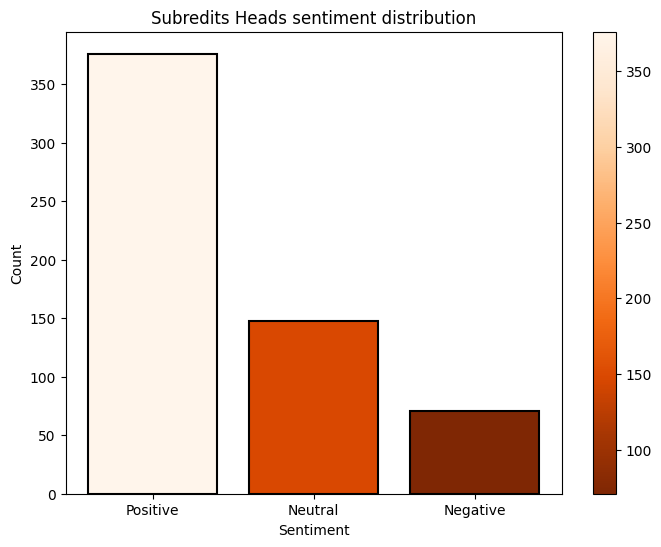

In [94]:
#@title Subredits head label distribution
values = filtered_df['head_label'].value_counts()
values.index = sentiment_distribution_labels

print(values)

norm = plt.Normalize(min(values.values), max(values.values))
colors = cmap(norm(values.values))
plt.figure(figsize=(8,6))
plt.bar(values.index, values.values, color=colors, edgecolor='black', linewidth=1.5)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))
plt.title('Subredits Heads sentiment distribution')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

Positive    297
Neutral     208
Negative     90
Name: body_label, dtype: int64


<ipython-input-95-ace8b898c42e>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))


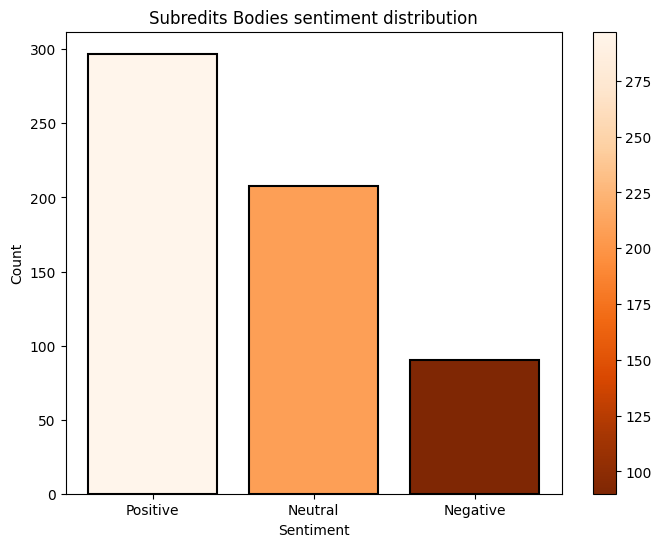

In [95]:
#@title Subredits body label distribution
values = filtered_df['body_label'].value_counts()
values.index = sentiment_distribution_labels

print(values)

norm = plt.Normalize(min(values.values), max(values.values))
colors = cmap(norm(values.values))
plt.figure(figsize=(8,6))
plt.bar(values.index, values.values, color=colors, edgecolor='black', linewidth=1.5)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))
plt.title('Subredits Bodies sentiment distribution')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

Positive    2358
Neutral     1534
Negative     935
Name: label_comments, dtype: int64


<ipython-input-96-3debf2bc5d96>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))


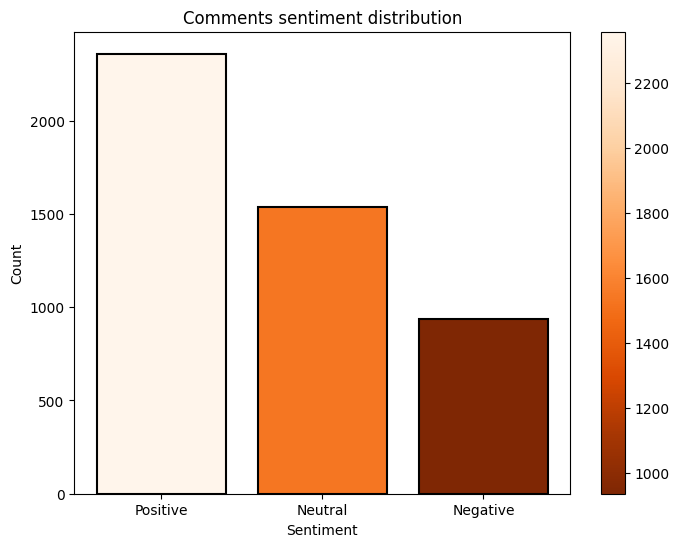

In [96]:
#@title Comments label distribution
values = comments_df['label_comments'].value_counts()
values.index = sentiment_distribution_labels

print(values)

norm = plt.Normalize(min(values.values), max(values.values))
colors = cmap(norm(values.values))
plt.figure(figsize=(8,6))
plt.bar(values.index, values.values, color=colors, edgecolor='black', linewidth=1.5)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))
plt.title('Comments sentiment distribution')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

In [97]:
#@title Comments Distribution in positive posts
# Get the label value counts
comments_df.rename(columns={"head_id":"id"}, inplace=True)
labels_per_id = comments_df.pivot_table(index='id', columns='label_comments',aggfunc='size', fill_value=0)
# Join the group by with the posts dataframe
with_comment_label_counts = pd.merge(labels_per_id, filtered_df, on='id')
with_comment_label_counts.rename(columns={-1:'comments_negative',0:"comments_neutral",1:'comments_positive'}, inplace=True)

comments_negative    290
comments_neutral     465
comments_positive    706
dtype: int64


<ipython-input-98-54e3bcf26bd8>:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))


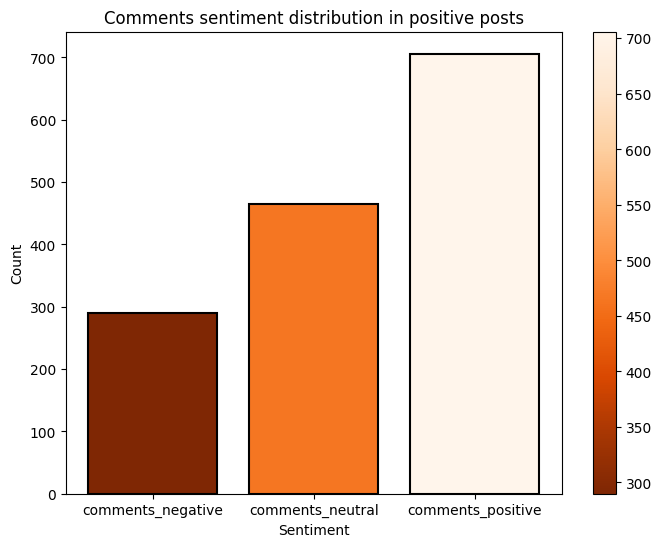

In [98]:
# Filter positive posts
postive_posts_df = with_comment_label_counts[with_comment_label_counts['head_label']==1]
postive_posts = postive_posts_df[['comments_negative','comments_neutral','comments_positive']].sum()

print(postive_posts)

# Plot results
norm = plt.Normalize(min(postive_posts.values), max(postive_posts.values))
colors = cmap(norm(postive_posts.values))
plt.figure(figsize=(8,6))
plt.bar(postive_posts.index, postive_posts.values, color=colors, edgecolor='black', linewidth=1.5)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))
plt.title('Comments sentiment distribution in positive posts')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

comments_negative    120
comments_neutral     220
comments_positive    279
dtype: int64


<ipython-input-99-a2db15522bd6>:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))


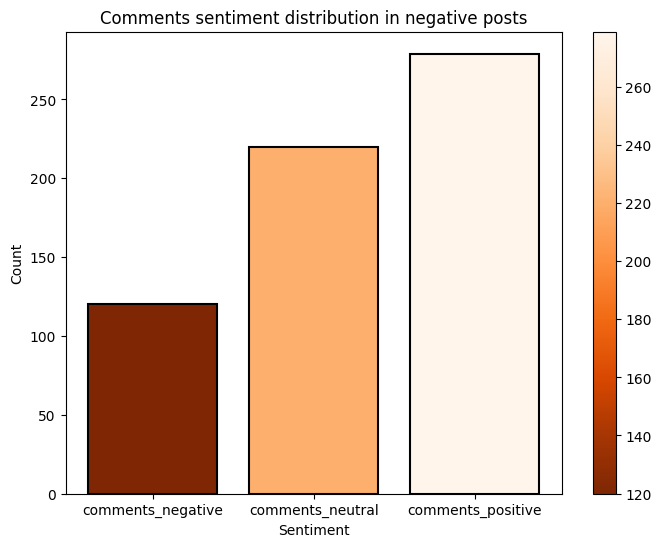

In [99]:
#@title Comments distribution on negative posts
# Filter negative posts
negative_posts_df = with_comment_label_counts[with_comment_label_counts['head_label']==-1]
negative_posts = negative_posts_df[['comments_negative','comments_neutral','comments_positive']].sum()

print(negative_posts)

# Plot results
norm = plt.Normalize(min(negative_posts.values), max(negative_posts.values))
colors = cmap(norm(negative_posts.values))
plt.figure(figsize=(8,6))
plt.bar(negative_posts.index, negative_posts.values, color=colors, edgecolor='black', linewidth=1.5)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))
plt.title('Comments sentiment distribution in negative posts')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

### Estadísticas

In [100]:
#@title subredit heads labels statistics
mean = filtered_df['head_label'].mean()
std = filtered_df['head_label'].std()
print(f"mean: {mean} - std: {std}")

mean: 0.12941176470588237 - std: 0.593221096690204


In [101]:
#@title subredit bodies labels statistics
mean = filtered_df['body_label'].mean()
std = filtered_df['body_label'].std()
print(f"mean: {mean} - std: {std}")

mean: 0.1495798319327731 - std: 0.9098112755777001


In [102]:
#@title comments labels statistics
mean = comments_df['label_comments'].mean()
std = comments_df['label_comments'].std()
print(f"mean: {mean} - std: {std}")

mean: 0.2948000828672053 - std: 0.7716349725686363


### Correlation

In [103]:
filtered_df['head_label'].corr(filtered_df['body_label'])

0.095081087416507

In [104]:
comments_average = comments_df.groupby('id')['label_comments'].mean().reset_index()
comments_average.rename(columns={'label_comments':'comments_averages'}, inplace=True)

In [105]:
df_with_averages = pd.merge(filtered_df, comments_average, on='id', how='inner')
df_with_averages

,id,head,head_label,body,body_label,timestamp,comments,comments_averages
0,1,How can I make ChatGPT stop writing me novels ...,0,I ask for the smallest bits of information and...,-1,02-01-2024 09:47:19,"{'body_comments': ['""Be concise and to the poi...",-0.142857
1,2,Dumb Question: How do I know if I have the Ope...,-1,"I am not sure who to ask, so am hoping the Red...",1,02-01-2024 07:51:33,{'body_comments': ['This is the playground. E...,-1.000000
2,3,Searching for a graphic about the six strategi...,1,"Hi everyone, about a month ago i saw a beautif...",1,02-01-2024 09:36:23,{'body_comments': ['Not sure if this helps you...,0.444444
3,5,GPT custom information,0,I wanted to create an application that incorpo...,-1,02-01-2024 13:17:40,"{'body_comments': [], 'label_comments': [], 't...",0.000000
4,7,Need help for ChatGPT ...,0,"Hey, buddies, \n\nI am Jaldip, currently a stu...",1,02-01-2024 13:14:58,"{'body_comments': [], 'label_comments': [], 't...",1.000000
...,...,...,...,...,...,...,...,...
526,589,How to build a data streaming pipeline for rea...,1,How to build a data streaming pipeline for re...,1,05-12-2023 15:03:56,"{'body_comments': [], 'label_comments': [], 't...",0.000000
527,591,GPTs vs Assistants,0,OpenAI has published a helpful article explain...,1,05-12-2023 16:16:45,"{'body_comments': [], 'label_comments': [], 't...",0.500000
528,592,Whisper AI with the best UI and Word integrati...,1,Dragon is good but Whisper AI is better. The p...,1,05-12-2023 10:44:50,{'body_comments': ['If you’re using Word anywa...,0.333333
529,593,Not even sure if this is possible,-1,"Hey guys, \n\nWhat I am wanting to know is it ...",1,05-12-2023 13:50:36,{'body_comments': ['You can do some ML and wri...,0.000000


-0.0163059565929284


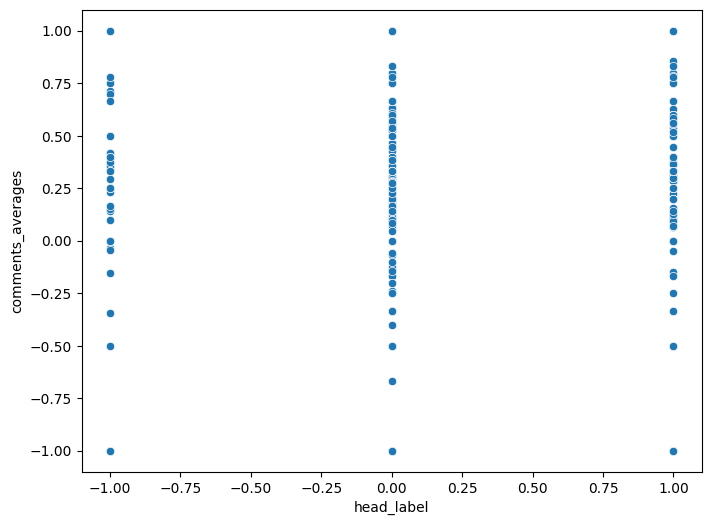

In [106]:
import seaborn as sns
corr = df_with_averages['head_label'].corr(df_with_averages['comments_averages'])
print(corr)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_with_averages['head_label'],y=df_with_averages['comments_averages'])
plt.show()

-0.017696455423245484


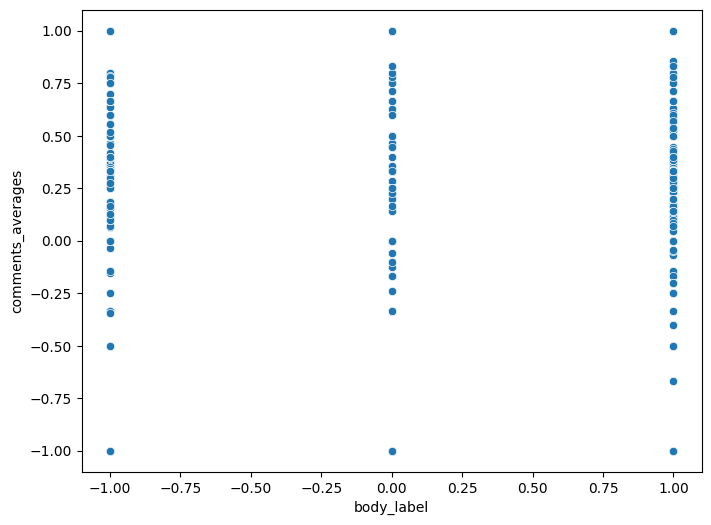

In [107]:
corr = df_with_averages['body_label'].corr(df_with_averages['comments_averages'])
print(corr)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_with_averages['body_label'],y=df_with_averages['comments_averages'])
plt.show()

### Wordcloud

In [108]:
import re

# Function to clean the text: remove single characters, punctuation like n't, and stopwords
def clean_text(text):

    # Remove single characters
    text = re.sub(r'\b\w{1}\b', '', text)
    # Remove contractions like n't
    text = re.sub(r"n\'t", '', text)
    # Remove any non-word characters and additional spaces
    text = re.sub(r'\W+', ' ', text).strip()

    return text

In [109]:
import nltk

nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize
import string

# Text extraction function
def extract_text_from_df(df):
  text = " ".join(comment for comment in df['head'])
  text = clean_text(text)
  alltokens = word_tokenize(text)
  alltokens = [w.lower() for w in alltokens if w not in string.punctuation]
  forbiden_words = ['will', 'use', 'ai', 'chatgpt', 'openai','gpt','re']
  alltokens = [w.lower() for w in alltokens if w not in forbiden_words]
  return " ".join(alltokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [110]:
#@title downloading image mask
import requests
from PIL import Image
from io import BytesIO
import numpy as np

file_id = "1DU7uiY2-kSc8td9kXAmOrclU1LofteDo" # @param {type:"string"}

# Replace this with the path to your file
# Modify the URL for direct download
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Get the content of the file
!wget --no-check-certificate '{url}' -O 'downloaded_image.jpg'

# Assuming the file is an image, open it using PIL
image_path = 'downloaded_image.jpg'
mask_image = Image.open(image_path)
mask_array = np.array(mask_image)

--2024-01-12 18:17:58--  https://drive.google.com/uc?export=download&id=1DU7uiY2-kSc8td9kXAmOrclU1LofteDo
Resolving drive.google.com (drive.google.com)... 172.253.115.101, 172.253.115.113, 172.253.115.102, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1DU7uiY2-kSc8td9kXAmOrclU1LofteDo&export=download [following]
--2024-01-12 18:17:58--  https://drive.usercontent.google.com/download?id=1DU7uiY2-kSc8td9kXAmOrclU1LofteDo&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.62.132, 2607:f8b0:4004:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.62.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5466 (5.3K) [image/png]
Saving to: ‘downloaded_image.jpg’

downloaded_image.jp 100%[===================>]   5.34K  --.-KB/s    in 0

In [111]:
#@title Word cloud creation
from wordcloud import WordCloud
from wordcloud import STOPWORDS

min_font_size, max_font_size = 10, 100
def build_wordcloud(text, title):
  # Adjusting the custom color function for a smooth gradient from blue to orange
  def gradient_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
      # Scale font_size to range [0, 1]
      scale = (font_size - min_font_size) / (max_font_size - min_font_size)

      # Linear interpolation between Reddit blue and orange colors
      # Reddit blue: (95, 153, 207), Reddit orange: (255, 69, 0)
      r = int(scale * 255 + (1 - scale) * 95)  # Interpolating red component
      g = int(scale * 69 + (1 - scale) * 153)  # Interpolating green component
      b = int(scale * 0 + (1 - scale) * 207)   # Interpolating blue component

      # Ensuring the RGB values are within the valid range [0, 255]
      r = max(0, min(255, r))
      g = max(0, min(255, g))
      b = max(0, min(255, b))

      return f"rgb({r}, {g}, {b})"

  # Creating the wordcloud
  wordcloud = WordCloud(width = 800, height = 800,
                  mask=mask_array,
                  background_color="rgba(255, 255, 255, 0)",
                  mode="RGBA",
                  stopwords = STOPWORDS,
                  contour_color='black',
                  min_font_size = 10).generate(text)
  wordcloud.recolor(color_func=gradient_color_func)

  # Display the wordcloud
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.tight_layout(pad = 0)

  # Save the resulting word cloud with a transparent background
  wordcloud_path = title+'.png'
  plt.show(), wordcloud_path
  wordcloud.to_file(wordcloud_path)

In [112]:
# Join table with the head label with the comments table
post_id_and_label = filtered_df[["id", "body_label"]]
comments_and_post_label = pd.merge(comments_df, post_id_and_label, on='id')
comments_and_post_label = filtered_df
comments_and_post_label.head()

,id,head,head_label,body,body_label,timestamp,comments
0,1,How can I make ChatGPT stop writing me novels ...,0,I ask for the smallest bits of information and...,-1,02-01-2024 09:47:19,"{'body_comments': ['""Be concise and to the poi..."
1,2,Dumb Question: How do I know if I have the Ope...,-1,"I am not sure who to ask, so am hoping the Red...",1,02-01-2024 07:51:33,{'body_comments': ['This is the playground. E...
2,3,Searching for a graphic about the six strategi...,1,"Hi everyone, about a month ago i saw a beautif...",1,02-01-2024 09:36:23,{'body_comments': ['Not sure if this helps you...
3,4,What one article/video/paper/etc. in 2023 best...,1,"Put differently, what did you read/watch that ...",0,02-01-2024 03:36:47,{'body_comments': ['Sparks of AGI https://ar...
4,5,GPT custom information,0,I wanted to create an application that incorpo...,-1,02-01-2024 13:17:40,"{'body_comments': [], 'label_comments': [], 't..."


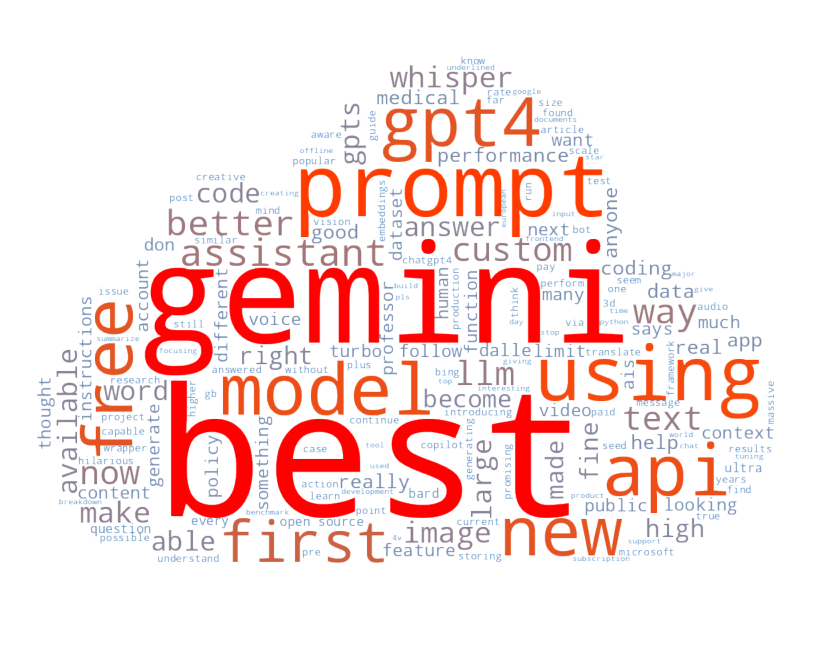

In [113]:
#@title Positive comments word cloud
# Filter positive posts
positive_headers = comments_and_post_label[comments_and_post_label['head_label'] == 1]
text = extract_text_from_df(positive_headers)
# Show the wordcloud
build_wordcloud(text, "positive_headers")

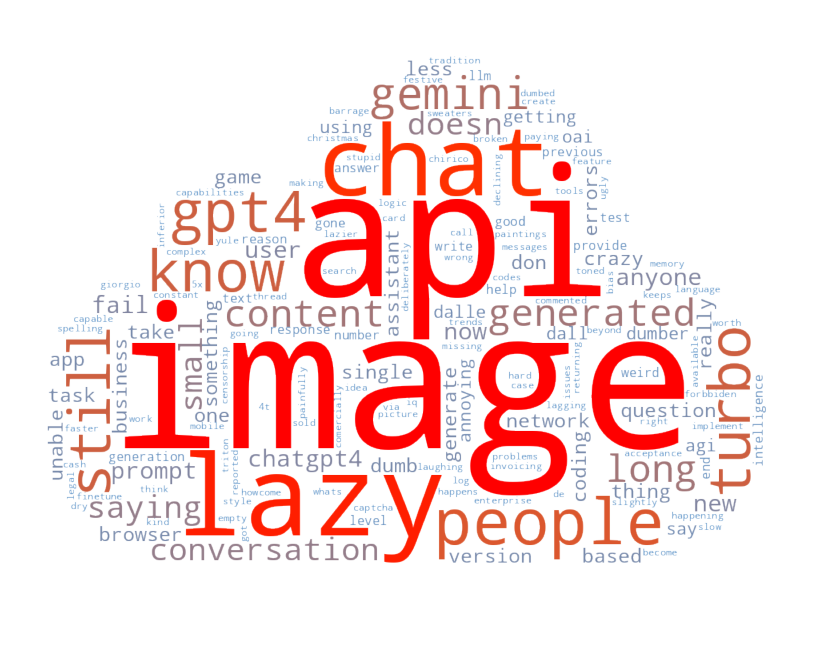

In [114]:
#@title Negative comments word cloud
# Filter negative posts
headers_negative = comments_and_post_label[comments_and_post_label['head_label'] == -1]
text = extract_text_from_df(headers_negative)
# Show the wordcloud
build_wordcloud(text, "negative_headers")

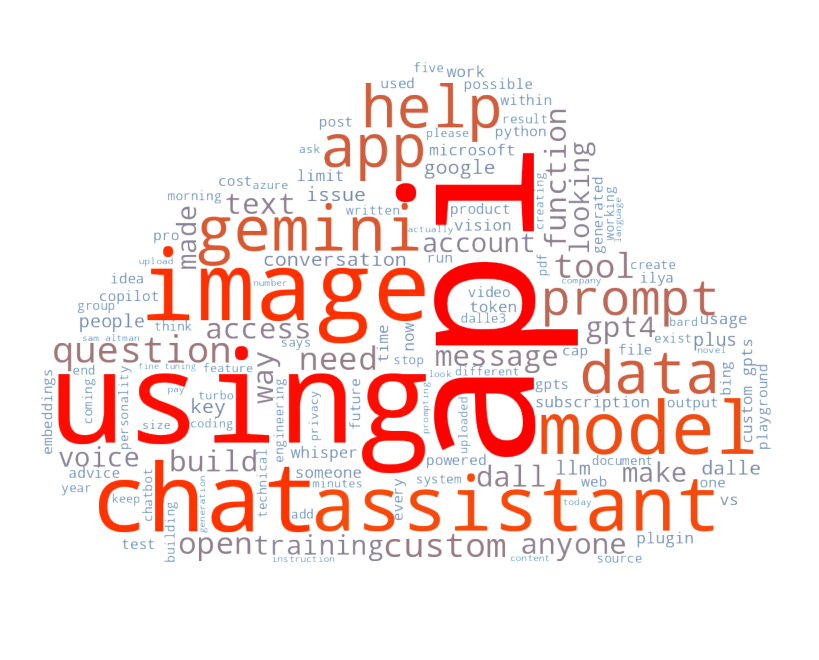

In [115]:
#@title Neutral headers word cloud
# Filter neutral posts
heads_neutral = comments_and_post_label[comments_and_post_label['head_label'] == 0]
text = extract_text_from_df(heads_neutral)
# Show the wordcloud
build_wordcloud(text, "neutral_headers")

## Sentiment over time analysis

In [199]:
#@title plottig sentiments
import matplotlib as mpl
def sentiment_ploting(sentiment_df, values_column, title):
  plt.figure(figsize=(10, 5))
  ax = plt.plot(sentiment_df, color='k', linewidth=0.5)
  plt.fill_between(sentiment_df.index, sentiment_df[values_column], 0, where=sentiment_df[values_column] > 0, interpolate=True, color='blue',hatch='/', alpha=0.3)
  plt.fill_between(sentiment_df.index, sentiment_df[values_column], 0, where=sentiment_df[values_column] < 0, interpolate=True, color='red',hatch='/', alpha=0.3)
  mpl.rcParams['hatch.linewidth'] = 0.2

  plt.title(title)

  # Add a horizontal line at y=0
  plt.axhline(y=0, color='r', linestyle='-')
  # Display the plot
  #plt.legend()
  plt.show()

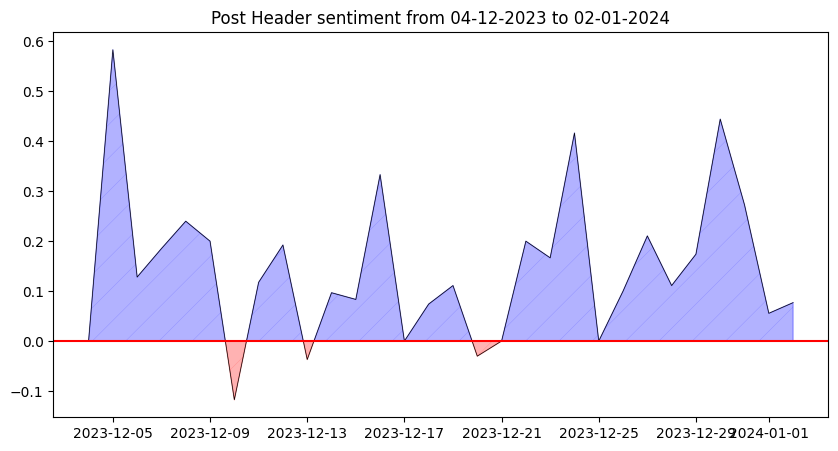

In [200]:
#@title Headers sentiment over time
# Transform the timestamp to datetime
filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'], dayfirst=True)
# Get the comments and label information for the time represetation
headers_sentiment = filtered_df.pivot_table(index='timestamp', values='head_label')
# Sort dates
headers_sentiment.sort_values('timestamp', inplace=True)
# Resample to make it daily
headers_sentiment = headers_sentiment.resample('D').mean()

min_date = min(headers_sentiment.index).date().strftime("%d-%m-%Y")
max_date = max(headers_sentiment.index).date().strftime("%d-%m-%Y")

sentiment_ploting(headers_sentiment, 'head_label', f'Post Header sentiment from {min_date} to {max_date}')

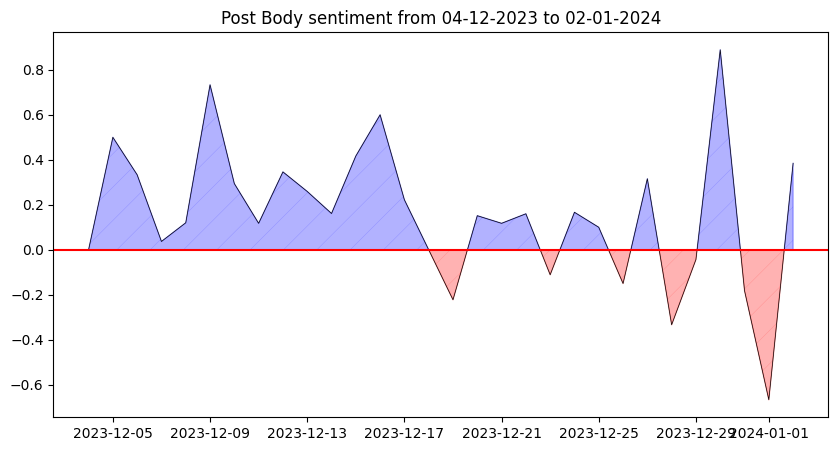

In [201]:
#@title Body sentiment over time

# Get the comments and label information for the time represetation
body_sentiment = filtered_df.pivot_table(index='timestamp', values='body_label')
# Sort dates
body_sentiment.sort_values('timestamp', inplace=True)
# Resample to make it daily
body_sentiment = body_sentiment.resample('D').mean()

min_date = min(body_sentiment.index).date().strftime("%d-%m-%Y")
max_date = max(body_sentiment.index).date().strftime("%d-%m-%Y")

sentiment_ploting(body_sentiment, 'body_label', f'Post Body sentiment from {min_date} to {max_date}')

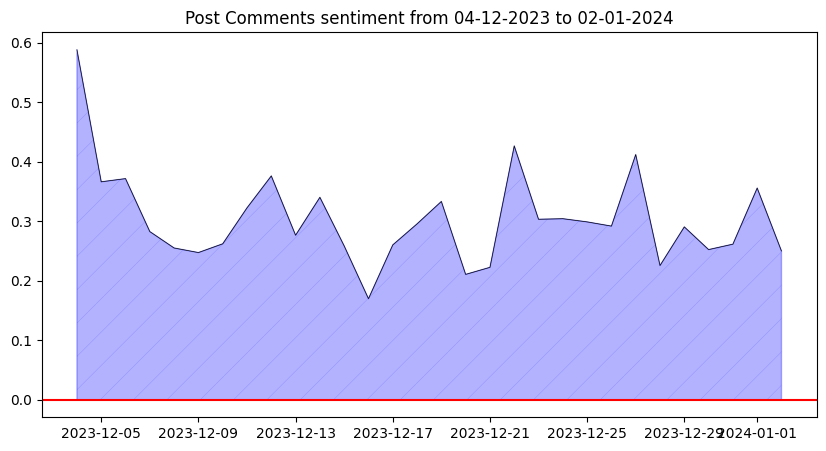

In [202]:
#@title Comments sentiment over time

# Transform the timestamp to datetime
comments_df['timestamp_comments'] = pd.to_datetime(comments_df['timestamp_comments'], dayfirst=True)
# Get the comments and label information for the time represetation
comments_sentiment = comments_df.pivot_table(index='timestamp_comments', values='label_comments')
# Sort dates
comments_sentiment.sort_values('timestamp_comments', inplace=True)
# Resample to make it daily
comments_sentiment = comments_sentiment.resample('D').mean()

min_date = min(comments_sentiment.index).date().strftime("%d-%m-%Y")
max_date = max(comments_sentiment.index).date().strftime("%d-%m-%Y")

sentiment_ploting(comments_sentiment, 'label_comments', f'Post Comments sentiment from {min_date} to {max_date}')